In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
data=pd.read_csv("dataset.csv")
data.head(5)

,Label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(6000, 785)

In [4]:
data.dtypes

Label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [5]:
data.isnull().sum()

Label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

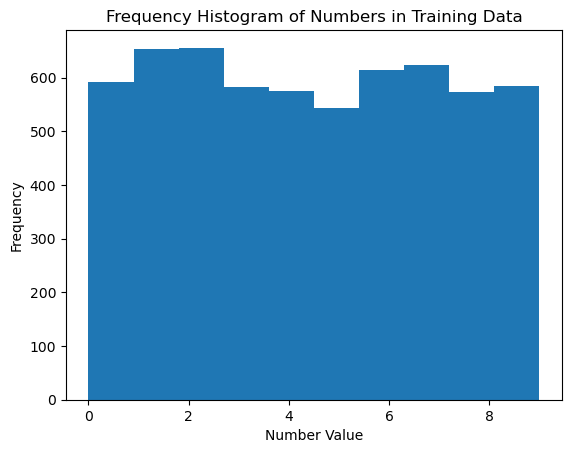

In [6]:
import matplotlib.pyplot as plt
plt.hist(data["Label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")
plt.show()

In [7]:
y=data['Label']
X=data.drop('Label', axis=1)

In [8]:
#X=X.drop('S.No', axis=1)

In [9]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X.head()
X.shape

(6000, 784)

In [11]:
y.head()
y.shape

(6000,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state = 42)

In [13]:
X_train.shape

(4800, 784)

In [14]:
X_test.shape

(1200, 784)

In [15]:
X_train.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
import time
from sklearn import  metrics
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() -start)
print(metrics.accuracy_score(y_test,y_pred))

0.6290366649627686
0.9383333333333334


In [19]:
from sklearn import  metrics
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       118
           1       0.95      0.98      0.96       161
           2       0.95      0.91      0.93       112
           3       0.94      0.96      0.95       105
           4       0.95      0.88      0.91       107
           5       0.98      0.95      0.97       103
           6       0.94      0.98      0.96       116
           7       0.91      0.94      0.93       126
           8       0.97      0.88      0.92       140
           9       0.84      0.90      0.87       112

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200




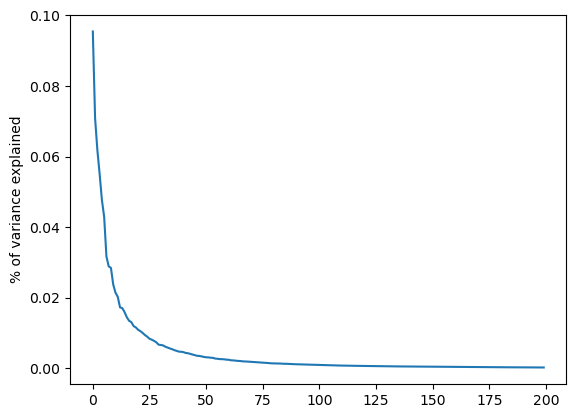

In [20]:
from sklearn import decomposition

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
plt.show()

#plot reaches asymptote at around 100, which is optimal number of PCs to use.

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
PCtrain = pca.transform(X_train)
PCval = pca.transform(X_test)

#decompose test data
#PCtest = pca.transform(X_test)


In [21]:
X_train1= PCtrain

In [22]:
X_cv = PCval

In [23]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train1,y_train)

SVC()

In [24]:
predicted = clf.predict(X_cv)
expected = y_test

In [25]:
print(predicted[0:30])

[6 3 1 4 7 0 2 7 8 9 9 9 7 7 6 1 6 0 8 5 5 5 7 8 6 3 9 0 6 6]


In [26]:
print(expected[0:30])

1782    6
3917    3
221     1
2135    9
5224    7
1168    0
879     2
156     7
1657    8
323     9
5302    9
2611    9
811     7
393     7
3593    6
2638    1
2187    6
5351    0
319     8
167     5
746     5
5470    5
3707    7
2764    8
5112    6
4006    3
1871    9
5756    0
3193    6
3754    6
Name: Label, dtype: int64


C:\Users\Beryl\AppData\Local\Temp\ipykernel_24616\530037492.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(expected[0:30])


In [27]:
from sklearn import  metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.99      0.98      0.98       161
           2       0.91      0.95      0.93       112
           3       0.92      0.90      0.91       105
           4       0.97      0.94      0.96       107
           5       0.99      0.96      0.98       103
           6       0.97      0.99      0.98       116
           7       0.93      0.96      0.95       126
           8       0.95      0.94      0.95       140
           9       0.93      0.91      0.92       112

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200




In [28]:
print('accurcy :',metrics.accuracy_score(expected, predicted))

accurcy : 0.9541666666666667


In [29]:
X_train.shape

(4800, 784)

In [30]:
y_train.shape

(4800,)

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dec_tree_cls=DecisionTreeClassifier()
dec_tree_cls.fit(X_train,y_train)
y_pred_dec=dec_tree_cls.predict(X_test)
print("Decision Tree Accuracy ",dec_tree_cls.score(X_test,y_test))
#number of base classifier
no_of_trees=25
#bagging classifier
bag_cls=BaggingClassifier(base_estimator=dec_tree_cls,n_estimators=no_of_trees,random_state=10, bootstrap=True, oob_score=True)
bag_cls.fit(X_train,y_train)
bag_cls.predict(X_test)
print("Bagging Classifier Accuracy ",bag_cls.score(X_test,y_test))

Decision Tree Accuracy  0.7983333333333333


C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


Bagging Classifier Accuracy  0.9141666666666667


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls=KNeighborsClassifier(n_neighbors=12)
knn_cls.fit(X_train,y_train)
y_pred_knn=knn_cls.predict(X_test)
print("KNN Accuracy ",knn_cls.score(X_test,y_test))
#number of base classifier
no_of_trees=5
#bagging classifier
bag_cls=BaggingClassifier(estimator=knn_cls,n_estimators=no_of_trees,random_state=10, bootstrap=True, oob_score=True)
bag_cls.fit(X_train,y_train)
bag_cls.predict(X_test)
print("Bagging Classifier Accuracy ",bag_cls.score(X_test,y_test))

KNN Accuracy  0.9283333333333333


C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


Bagging Classifier Accuracy  0.9291666666666667


In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6625

In [34]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.75)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9283333333333333

In [35]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9575 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       118
           1       0.98      0.98      0.98       161
           2       0.93      0.94      0.93       112
           3       0.92      0.91      0.92       105
           4       0.97      0.94      0.96       107
           5       0.99      0.95      0.97       103
           6       0.97      0.99      0.98       116
           7       0.94      0.98      0.96       126
           8       0.96      0.94      0.95       140
           9       0.93      0.92      0.92       112

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [36]:
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9075 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       118
           1       0.96      0.96      0.96       161
           2       0.85      0.91      0.88       112
           3       0.88      0.87      0.88       105
           4       0.89      0.90      0.89       107
           5       0.87      0.88      0.88       103
           6       0.94      0.96      0.95       116
           7       0.91      0.94      0.93       126
           8       0.93      0.81      0.87       140
           9       0.87      0.86      0.86       112

    accuracy                           0.91      1200
   macro avg       0.90      0.91      0.90      1200
weighted avg       0.91      0.91      0.91      1200



In [37]:
clf = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9433333333333334 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       118
           1       0.96      0.98      0.97       161
           2       0.89      0.93      0.91       112
           3       0.93      0.89      0.91       105
           4       0.99      0.94      0.97       107
           5       0.94      0.96      0.95       103
           6       0.98      0.96      0.97       116
           7       0.95      0.97      0.96       126
           8       0.95      0.91      0.93       140
           9       0.93      0.92      0.92       112

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [38]:
clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.09333333333333334 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.00      0.00      0.00       161
           2       0.09      1.00      0.17       112
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00       107
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00       116
           7       0.00      0.00      0.00       126
           8       0.00      0.00      0.00       140
           9       0.00      0.00      0.00       112

    accuracy                           0.09      1200
   macro avg       0.01      0.10      0.02      1200
weighted avg       0.01      0.09      0.02      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
clf = svm.SVC(C=1.0, kernel='sigmoid', degree=3, gamma='auto')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.09333333333333334 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.00      0.00      0.00       161
           2       0.09      1.00      0.17       112
           3       0.00      0.00      0.00       105
           4       0.00      0.00      0.00       107
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00       116
           7       0.00      0.00      0.00       126
           8       0.00      0.00      0.00       140
           9       0.00      0.00      0.00       112

    accuracy                           0.09      1200
   macro avg       0.01      0.10      0.02      1200
weighted avg       0.01      0.09      0.02      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8975 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       118
           1       0.99      0.95      0.97       161
           2       0.83      0.88      0.86       112
           3       0.83      0.89      0.86       105
           4       0.87      0.84      0.86       107
           5       0.87      0.89      0.88       103
           6       0.92      0.96      0.94       116
           7       0.97      0.89      0.93       126
           8       0.93      0.87      0.90       140
           9       0.79      0.85      0.82       112

    accuracy                           0.90      1200
   macro avg       0.89      0.90      0.89      1200
weighted avg       0.90      0.90      0.90      1200



In [41]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8683333333333333 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       118
           1       0.93      0.94      0.93       161
           2       0.83      0.90      0.86       112
           3       0.82      0.82      0.82       105
           4       0.89      0.80      0.84       107
           5       0.84      0.82      0.83       103
           6       0.92      0.95      0.94       116
           7       0.90      0.88      0.89       126
           8       0.85      0.76      0.80       140
           9       0.75      0.87      0.80       112

    accuracy                           0.87      1200
   macro avg       0.87      0.87      0.87      1200
weighted avg       0.87      0.87      0.87      1200



In [42]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='adam', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9258333333333333 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       118
           1       0.97      0.96      0.97       161
           2       0.90      0.96      0.93       112
           3       0.87      0.90      0.88       105
           4       0.90      0.91      0.90       107
           5       0.97      0.83      0.89       103
           6       0.93      0.99      0.96       116
           7       0.94      0.94      0.94       126
           8       0.95      0.86      0.90       140
           9       0.88      0.91      0.89       112

    accuracy                           0.93      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.93      0.93      0.93      1200



In [43]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='adam', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8908333333333334 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       118
           1       0.97      0.98      0.97       161
           2       0.86      0.89      0.88       112
           3       0.83      0.81      0.82       105
           4       0.85      0.87      0.86       107
           5       0.87      0.82      0.84       103
           6       0.87      0.95      0.91       116
           7       0.94      0.91      0.93       126
           8       0.95      0.81      0.87       140
           9       0.81      0.88      0.85       112

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



In [44]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.89 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       118
           1       0.99      0.94      0.97       161
           2       0.84      0.91      0.88       112
           3       0.86      0.83      0.84       105
           4       0.87      0.84      0.85       107
           5       0.87      0.81      0.84       103
           6       0.95      0.95      0.95       116
           7       0.91      0.90      0.91       126
           8       0.89      0.87      0.88       140
           9       0.78      0.87      0.82       112

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



In [45]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='identity', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8516666666666667 

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       118
           1       0.96      0.95      0.95       161
           2       0.82      0.85      0.83       112
           3       0.77      0.79      0.78       105
           4       0.84      0.83      0.84       107
           5       0.72      0.74      0.73       103
           6       0.88      0.92      0.90       116
           7       0.92      0.88      0.90       126
           8       0.84      0.77      0.81       140
           9       0.76      0.81      0.78       112

    accuracy                           0.85      1200
   macro avg       0.85      0.85      0.85      1200
weighted avg       0.85      0.85      0.85      1200



In [47]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9083333333333333 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       118
           1       0.98      0.96      0.97       161
           2       0.88      0.88      0.88       112
           3       0.86      0.84      0.85       105
           4       0.94      0.89      0.91       107
           5       0.87      0.82      0.84       103
           6       0.90      0.96      0.93       116
           7       0.90      0.95      0.93       126
           8       0.93      0.93      0.93       140
           9       0.88      0.88      0.88       112

    accuracy                           0.91      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.91      0.91      0.91      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [49]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9066666666666666 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       118
           1       0.98      0.97      0.97       161
           2       0.82      0.92      0.87       112
           3       0.86      0.86      0.86       105
           4       0.91      0.87      0.89       107
           5       0.88      0.84      0.86       103
           6       0.92      0.95      0.94       116
           7       0.94      0.93      0.93       126
           8       0.92      0.87      0.90       140
           9       0.86      0.88      0.87       112

    accuracy                           0.91      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.91      0.91      0.91      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [50]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='sgd', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.7666666666666667 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       118
           1       0.97      0.95      0.96       161
           2       0.89      0.84      0.86       112
           3       0.34      0.85      0.49       105
           4       0.83      0.88      0.85       107
           5       0.80      0.67      0.73       103
           6       0.94      0.91      0.93       116
           7       0.88      0.90      0.89       126
           8       0.71      0.04      0.07       140
           9       0.83      0.76      0.79       112

    accuracy                           0.77      1200
   macro avg       0.81      0.77      0.75      1200
weighted avg       0.82      0.77      0.75      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [51]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='identity', solver='adam', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.86 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       118
           1       0.96      0.96      0.96       161
           2       0.69      0.91      0.79       112
           3       0.85      0.84      0.84       105
           4       0.90      0.80      0.85       107
           5       0.74      0.73      0.73       103
           6       0.94      0.92      0.93       116
           7       0.96      0.90      0.93       126
           8       0.84      0.72      0.78       140
           9       0.78      0.84      0.81       112

    accuracy                           0.86      1200
   macro avg       0.86      0.86      0.86      1200
weighted avg       0.87      0.86      0.86      1200



In [52]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', solver='sgd', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8683333333333333 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       118
           1       0.97      0.96      0.96       161
           2       0.85      0.88      0.86       112
           3       0.80      0.85      0.82       105
           4       0.87      0.73      0.79       107
           5       0.86      0.77      0.81       103
           6       0.87      0.97      0.91       116
           7       0.88      0.89      0.89       126
           8       0.93      0.81      0.86       140
           9       0.73      0.85      0.78       112

    accuracy                           0.87      1200
   macro avg       0.87      0.86      0.86      1200
weighted avg       0.87      0.87      0.87      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation='tanh', solver='sgd', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.8891666666666667 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       118
           1       0.97      0.96      0.97       161
           2       0.81      0.88      0.85       112
           3       0.85      0.87      0.86       105
           4       0.88      0.86      0.87       107
           5       0.93      0.78      0.85       103
           6       0.89      0.93      0.91       116
           7       0.92      0.92      0.92       126
           8       0.89      0.85      0.87       140
           9       0.81      0.86      0.83       112

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.88      1200
weighted avg       0.89      0.89      0.89      1200



C:\Users\Beryl\newminiconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.935 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       118
           1       0.93      0.98      0.96       161
           2       0.97      0.89      0.93       112
           3       0.91      0.93      0.92       105
           4       0.94      0.90      0.92       107
           5       0.94      0.97      0.96       103
           6       0.95      0.96      0.95       116
           7       0.88      0.96      0.92       126
           8       1.00      0.87      0.93       140
           9       0.89      0.88      0.89       112

    accuracy                           0.94      1200
   macro avg       0.94      0.93      0.93      1200
weighted avg       0.94      0.94      0.93      1200



In [55]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9416666666666667 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       118
           1       0.96      0.98      0.97       161
           2       0.93      0.89      0.91       112
           3       0.94      0.96      0.95       105
           4       0.95      0.88      0.91       107
           5       0.99      0.96      0.98       103
           6       0.97      0.99      0.98       116
           7       0.90      0.97      0.93       126
           8       0.97      0.89      0.93       140
           9       0.87      0.89      0.88       112

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [56]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9408333333333333 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       118
           1       0.96      0.98      0.97       161
           2       0.94      0.92      0.93       112
           3       0.88      0.95      0.92       105
           4       0.97      0.92      0.94       107
           5       0.98      0.96      0.97       103
           6       0.96      0.99      0.97       116
           7       0.89      0.97      0.93       126
           8       0.99      0.85      0.92       140
           9       0.89      0.88      0.88       112

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [57]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9383333333333334 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       118
           1       0.95      0.98      0.96       161
           2       0.95      0.91      0.93       112
           3       0.94      0.96      0.95       105
           4       0.95      0.88      0.91       107
           5       0.98      0.95      0.97       103
           6       0.94      0.98      0.96       116
           7       0.91      0.94      0.93       126
           8       0.97      0.88      0.92       140
           9       0.84      0.90      0.87       112

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [58]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

accuracy: 0.9291666666666667 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       118
           1       0.95      0.98      0.96       161
           2       0.90      0.93      0.92       112
           3       0.88      0.96      0.92       105
           4       0.93      0.95      0.94       107
           5       0.95      0.92      0.94       103
           6       0.97      0.97      0.97       116
           7       0.85      0.94      0.89       126
           8       0.98      0.82      0.89       140
           9       0.95      0.81      0.88       112

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200



In [59]:
import math
import datetime
import platform

In [60]:
train,test=train_test_split(data, test_size = 0.3)

In [61]:
train.head

<bound method NDFrame.head of       Label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
231       6       0       0       0       0       0       0       0       0   
3200      1       0       0       0       0       0       0       0       0   
4549      2       0       0       0       0       0       0       0       0   
4312      2       0       0       0       0       0       0       0       0   
5932      9       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
4264      5       0       0       0       0       0       0       0       0   
4336      9       0       0       0       0       0       0       0       0   
3694      6       0       0       0       0       0       0       0       0   
1243      4       0       0       0       0       0       0       0       0   
594       1       0       0       0       0       0       0       0       0   

      pixel8  ...  pi

In [62]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4200 entries, 231 to 594
Columns: 785 entries, Label to pixel783
dtypes: int64(785)
memory usage: 25.2 MB


(None, (4200, 785))

In [63]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 3325 to 4028
Columns: 785 entries, Label to pixel783
dtypes: int64(785)
memory usage: 10.8 MB


(None, (1800, 785))

In [64]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

In [65]:
X.dtypes

pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object

In [66]:
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

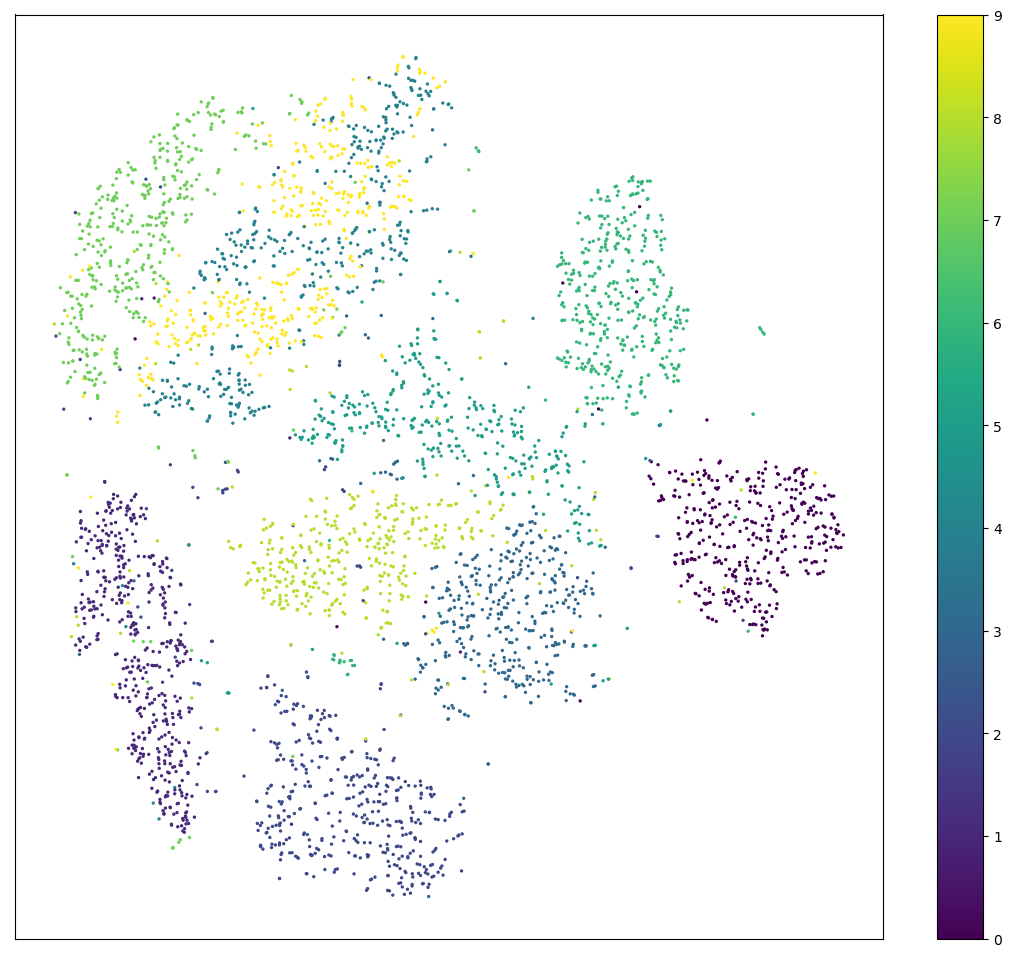

In [67]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();